In [223]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt

### Prompts:

* Health social: Upgrade your meals with the natural protein source athletes are turning to
* Health: Fuel your body with clean, high-quality protein. Cricket flour makes every meal a performance boost.
* Sustainability social: Be part of the movement reducing food’s footprint. Cricket flour saves land and water with every meal
* Sustainability: Every choice count: switch to cricket flour and cut your environmental impact without giving up nutrition.

In [224]:
df = pd.read_csv("csv_files\cricket_flour_second_stage.csv")

<>:1: SyntaxWarning: invalid escape sequence '\c'
<>:1: SyntaxWarning: invalid escape sequence '\c'
C:\Users\VOrozco\AppData\Local\Temp\ipykernel_59464\3249341473.py:1: SyntaxWarning: invalid escape sequence '\c'
  df = pd.read_csv("csv_files\cricket_flour_second_stage.csv")


In [225]:
df.head()

,buying_intention,click,health_conscious,sustainability,prior_exposure,cooking_frequency,age,gender,location,group
0,3,Yes,3,5,No,2,25-34,Female,Czech Republic,control
1,3,Yes,2,4,No,2,44-above,Female,France,health_social
2,6,Yes,2,2,Yes,3,25-34,Male,Spain,sus_social
3,3,No,2,2,Yes,3,44-above,Female,Greece,health_regular
4,2,Yes,3,4,No,1,25-34,Female,Italy,control


group
control          2.447761
health_social    3.990610
Name: buying_intention, dtype: float64
group
control           2.447761
health_regular    3.010363
Name: buying_intention, dtype: float64
group
control       2.447761
sus_social    4.692708
Name: buying_intention, dtype: float64
group
control        2.447761
sus_regular    3.208955
Name: buying_intention, dtype: float64


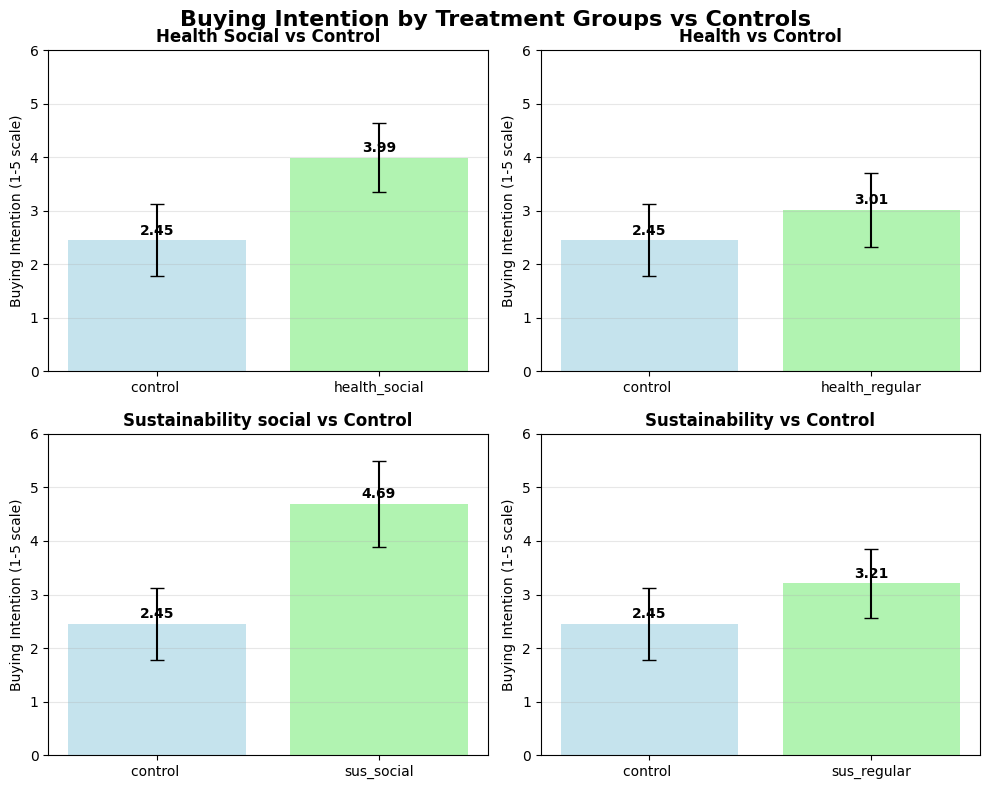

In [226]:
# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Buying Intention by Treatment Groups vs Controls', fontsize=16, fontweight='bold')

# Define group comparisons
comparisons = [
    (['health_social', 'control'], 'Health Social vs Control'),
    (['health_regular', 'control'], 'Health vs Control'), 
    (['sus_social', 'control'], 'Sustainability social vs Control'),
    (['sus_regular', 'control'], 'Sustainability vs Control')
]

for idx, (groups_to_plot, title) in enumerate(comparisons):
    row = idx // 2
    col = idx % 2
    
    # Filter data for this comparison
    plot_data = df[df['group'].isin(groups_to_plot)]
    
    # Create bar plot
    means = plot_data.groupby('group')['buying_intention'].mean()
    print(means)
    stds = plot_data.groupby('group')['buying_intention'].std()
    
    bars = axes[row, col].bar(range(len(means)), means.values, 
                             color=['lightblue', 'lightgreen'], 
                             yerr=stds.values, capsize=5, alpha=0.7)
    
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Buying Intention (1-5 scale)')
    axes[row, col].set_xticks(range(len(means)))
    axes[row, col].set_xticklabels([g.replace('control', 'control ') for g in means.index])
    axes[row, col].set_ylim(0, 6)
    axes[row, col].grid(axis='y', alpha=0.3)
    
    # Add value labels on bars
    for i, (bar, val) in enumerate(zip(bars, means.values)):
        axes[row, col].text(bar.get_x() + bar.get_width()/2, val + 0.05, 
                           f'{val:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

In [227]:
df.columns

Index(['buying_intention', 'click', 'health_conscious', 'sustainability',
       'prior_exposure', 'cooking_frequency', 'age', 'gender', 'location',
       'group'],
      dtype='object')

In [228]:
df["click"] = df["click"].map({"Yes":1, "No":0})

In [229]:
df["click"]

0      1
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    0
999    0
Name: click, Length: 1000, dtype: int64

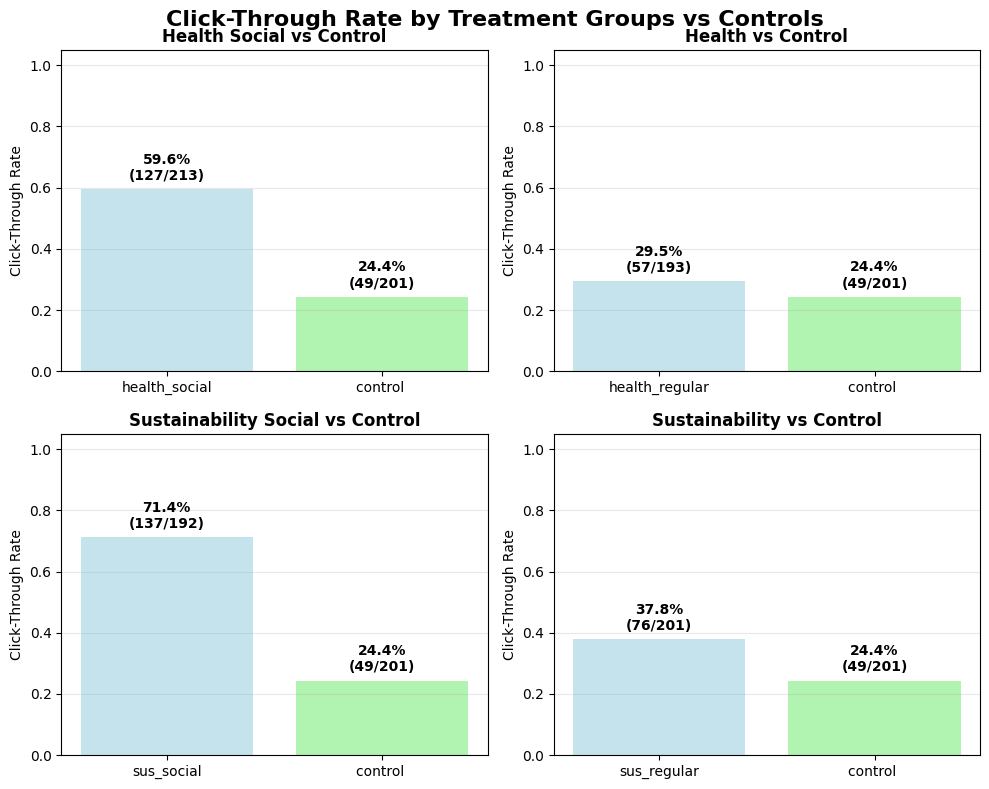

In [230]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Click-Through Rate by Treatment Groups vs Controls', fontsize=16, fontweight='bold')

comparisons = [
    (['health_social', 'control'], 'Health Social vs Control'),
    (['health_regular', 'control'], 'Health vs Control'), 
    (['sus_social', 'control'], 'Sustainability Social vs Control'),
    (['sus_regular', 'control'], 'Sustainability vs Control')
]

for idx, (groups_to_plot, title) in enumerate(comparisons):
    row = idx // 2
    col = idx % 2

    # Filter and ensure binary int type
    plot_data = df[df['group'].isin(groups_to_plot)].copy()
    plot_data['click'] = plot_data['click'].astype(int)

    # Aggregate: p (mean), n (size), and successes
    agg = (
        plot_data.groupby('group')['click']
        .agg(mean='mean', n='size', yes='sum')
        .reindex(groups_to_plot)
    )

    p = agg['mean'].to_numpy()          # proportion clicked
    n = agg['n'].to_numpy()
    # 95% CI using normal approx (Wilson is nicer, but this keeps it simple)
    ci = 1.96 * np.sqrt(np.where(n > 0, p * (1 - p) / n, 0))

    bars = axes[row, col].bar(range(len(p)),p, capsize=5, alpha=0.7, color =['lightblue', 'lightgreen'])

    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Click-Through Rate')
    axes[row, col].set_xticks(range(len(p)))
    axes[row, col].set_xticklabels([g.replace('control', 'control ') for g in agg.index])
    axes[row, col].set_ylim(0, 1.05)
    axes[row, col].grid(axis='y', alpha=0.3)

    # Annotate with percent and raw counts
    for bar, val, yes, total in zip(bars, p, agg['yes'].to_numpy(), n):
        axes[row, col].text(
            bar.get_x() + bar.get_width()/2, 
            val + 0.02, 
            f'{val:.1%}\n({int(yes)}/{int(total)})',
            ha='center', va='bottom', fontweight='bold'
        )

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


## RELEVANT QUESTIONS TO ANSWER


1. Are there any differences in click rates or buying intention from those who have tried insect products in the past versus those who haven’t?
2. Are there any differences in click rates or buying intention between those who consider health and nutrition relevant when choosing products vs those who don’t?
3. Are there any differences in click rates or buying intention between those who consider sustainability relevant when choosing products vs those who don’t?
4. Which age range has higher buying intention and higher click rates?
5. Are there any differences in click rates and buying intention by country?
6. Which are the variables that mostly contribute to high buying intention
7. Which are the variables that mostly contribute to high click rates.




1. Are there any differences in click rates or buying intention from those who have tried insect products in the past versus those who haven’t?

In [231]:
df["prior_exposure"] = df["prior_exposure"].map({"Yes":1, "No":0})

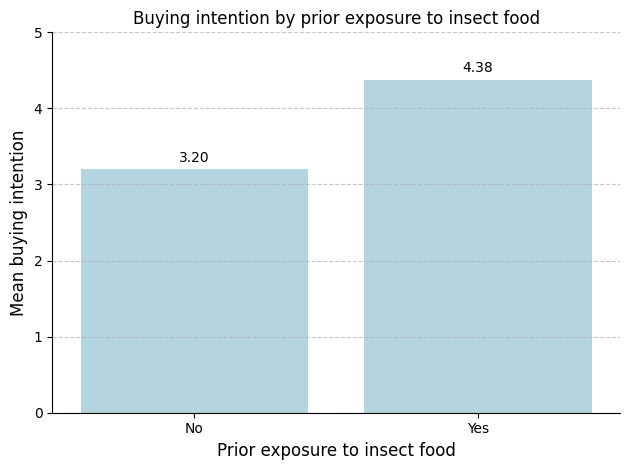

In [232]:
ax= sns.barplot(data=df, y="buying_intention", x= "prior_exposure", color= 'lightblue', errorbar=None)
ax.set_xlabel("Prior exposure to insect food", fontsize= 12)
ax.set_ylabel("Mean buying intention", fontsize= 12)
ax.spines[["right","top"]].set_visible(False)
ax.yaxis.grid(True, linestyle= "--", alpha= 0.7)
ax.set_ylim(0,5)
ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Yes"])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.2f}",                # format to 2 decimals
        (p.get_x() + p.get_width() / 2, height), # center of bar top
        ha="center", va="bottom",       # horizontal & vertical alignment
        fontsize=10, color="black", 
        xytext=(0, 3), textcoords="offset points" # small vertical offset
    )
plt.title("Buying intention by prior exposure to insect food")
plt.tight_layout()
plt.show()


In [233]:
df.columns

Index(['buying_intention', 'click', 'health_conscious', 'sustainability',
       'prior_exposure', 'cooking_frequency', 'age', 'gender', 'location',
       'group'],
      dtype='object')

C:\Users\VOrozco\AppData\Local\Temp\ipykernel_59464\4146619517.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["No", "Yes"])


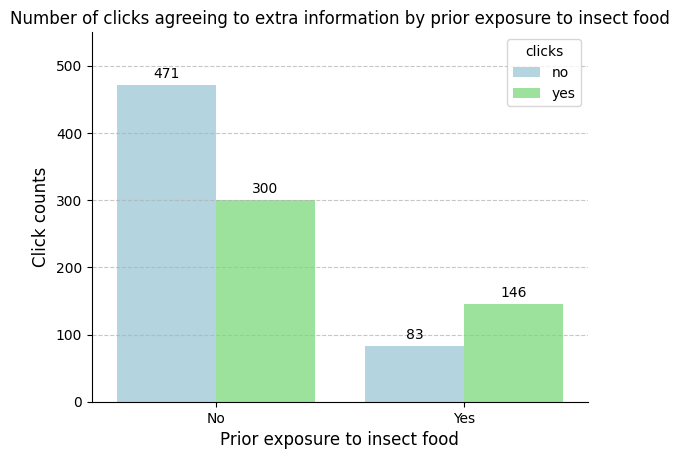

In [234]:
ax= sns.countplot(data=df, x="prior_exposure", hue= "click", palette=['lightblue', 'lightgreen'])
ax.set_xlabel("Prior exposure to insect food", fontsize= 12)
ax.set_ylabel("Click counts", fontsize= 12)
ax.spines[["right","top"]].set_visible(False)
ax.yaxis.grid(True, linestyle= "--", alpha= 0.7)
ax.set_ylim(0,550)
#ax.set_xticks([0, 1])
ax.set_xticklabels(["No", "Yes"])

for container in ax.containers:
    vals = container.datavalues  # these are the bar heights
    labels = [f"{int(v)}" if v > 0 else "" for v in vals]  # hide 0s
    ax.bar_label(container, labels=labels, label_type="edge", padding=3, fontsize=10)
    
plt.title("Number of clicks agreeing to extra information by prior exposure to insect food")
plt.legend(labels=["no", "yes"], title= "clicks")
plt.show()


In [235]:
df["age"].value_counts()

age
25-34       358
35-44       228
18-24       208
44-above    206
Name: count, dtype: int64

In [236]:
def cooking_mapping(value):
    if value in [1,2]:
       return "low frequency"
    elif value in[3,4,5]:
       return "medium_frequency"
    elif value in [6,7]:
       return "high_frequency"

In [237]:
df["cooking_frequency"] = df["cooking_frequency"].aggregate(cooking_mapping)

C:\Users\VOrozco\AppData\Local\Temp\ipykernel_59464\4257996409.py:1: FutureWarning: using <function cooking_mapping at 0x000001ABCE32E980> in Series.agg cannot aggregate and has been deprecated. Use Series.transform to keep behavior unchanged.
  df["cooking_frequency"] = df["cooking_frequency"].aggregate(cooking_mapping)


<Axes: xlabel='buying_intention', ylabel='count'>

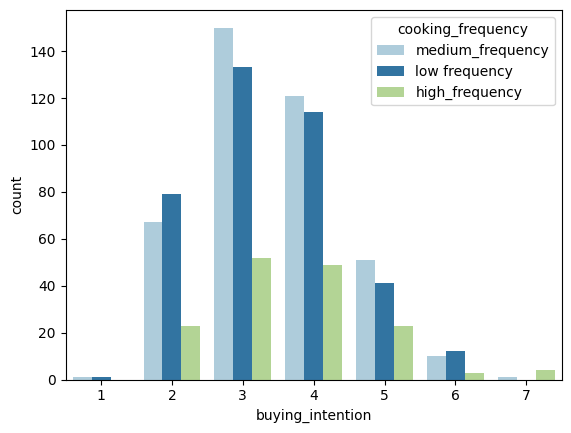

In [238]:
sns.countplot(data= df, x= "buying_intention", hue= "cooking_frequency", palette= "Paired")

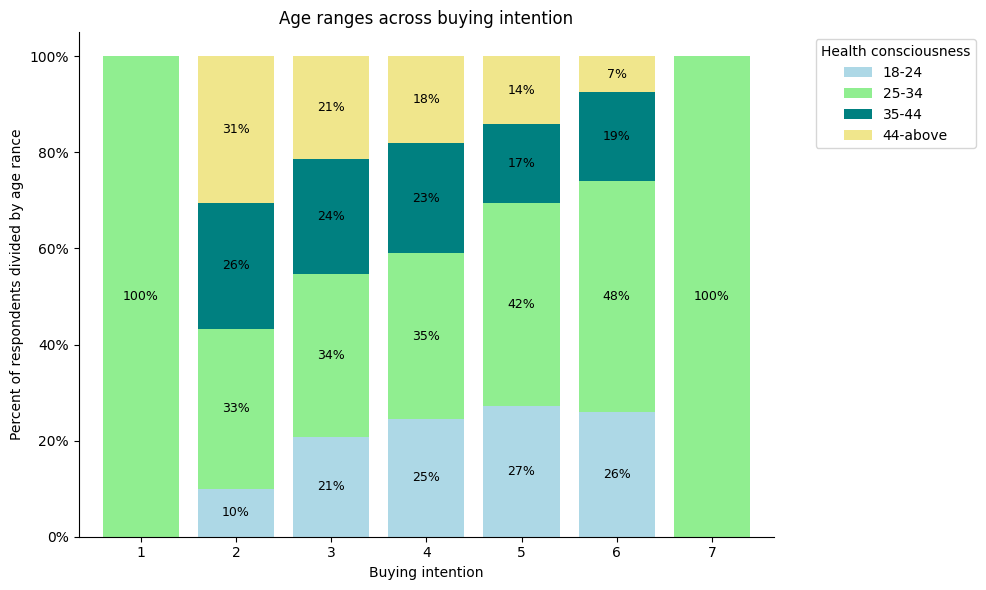

In [239]:
# Optional: enforce an order for readability
age_order = ["18-24", "25-34", "35-44", "44-above"]
# Buying intention order if you want left-to-right (adjust as needed)
bi_order = sorted(df["buying_intention"].unique())

# Crosstab so each BAR = one health category; segments = buying intention
prop_table = pd.crosstab(
    df["buying_intention"],
    df["age"],
    normalize="index"
).reindex(index=bi_order, columns = age_order)

# Plot
ax = prop_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["lightblue", "lightgreen", "teal", "khaki", "lightcoral", "plum"][:prop_table.shape[1]],
    width=0.8
)

# Titles/labels
plt.title("Age ranges across buying intention")
plt.xlabel("Buying intention")
plt.ylabel("Percent of respondents divided by age rance")

# Y-axis as percentages (data are 0–1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Clean spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Inside-segment % labels (0–1 -> 0–100%)
for container in ax.containers:
    values = container.datavalues  # these are proportions
    # Only label segments that are big enough to read
    labels = [f"{v*100:.0f}%" if v >= 0.06 else "" for v in values]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=9)

# Legend formatting
plt.legend(title="Health consciousness", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


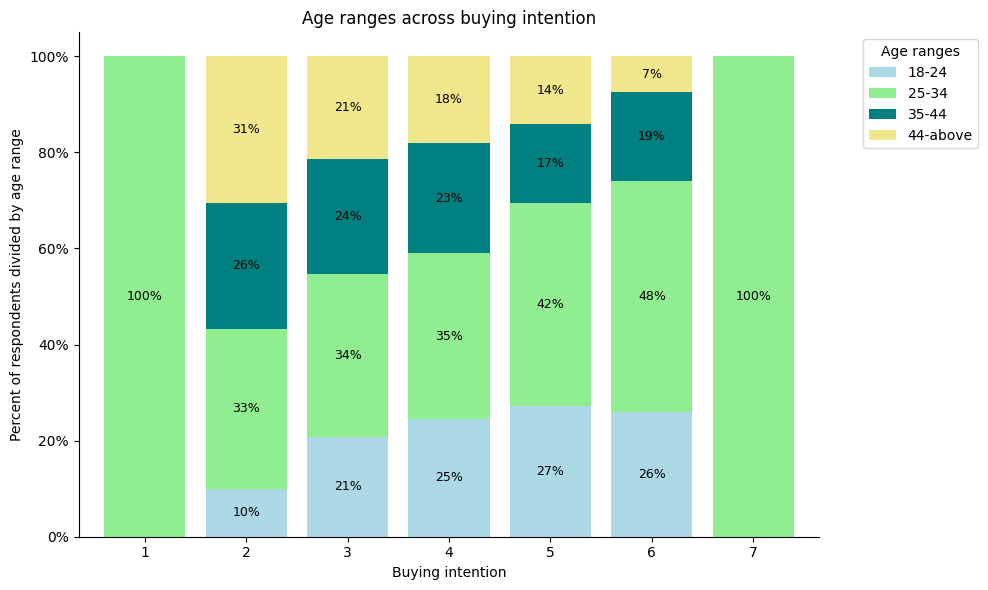

In [240]:
# Optional: enforce an order for readability
age_order = ["18-24", "25-34", "35-44", "44-above"]
# Buying intention order if you want left-to-right (adjust as needed)
bi_order = sorted(df["buying_intention"].unique())

# Crosstab so each BAR = one health category; segments = buying intention
prop_table = pd.crosstab(
    df["buying_intention"],
    df["age"],
    normalize="index"
).reindex(index=bi_order, columns = age_order)

# Plot
ax = prop_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["lightblue", "lightgreen", "teal", "khaki", "lightcoral", "plum"][:prop_table.shape[1]],
    width=0.8
)

# Titles/labels
plt.title("Age ranges across buying intention")
plt.xlabel("Buying intention")
plt.ylabel("Percent of respondents divided by age range")

# Y-axis as percentages (data are 0–1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Clean spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Inside-segment % labels (0–1 -> 0–100%)
for container in ax.containers:
    values = container.datavalues  # these are proportions
    # Only label segments that are big enough to read
    labels = [f"{v*100:.0f}%" if v >= 0.06 else "" for v in values]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=9)

# Legend formatting
plt.legend(title="Age ranges", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


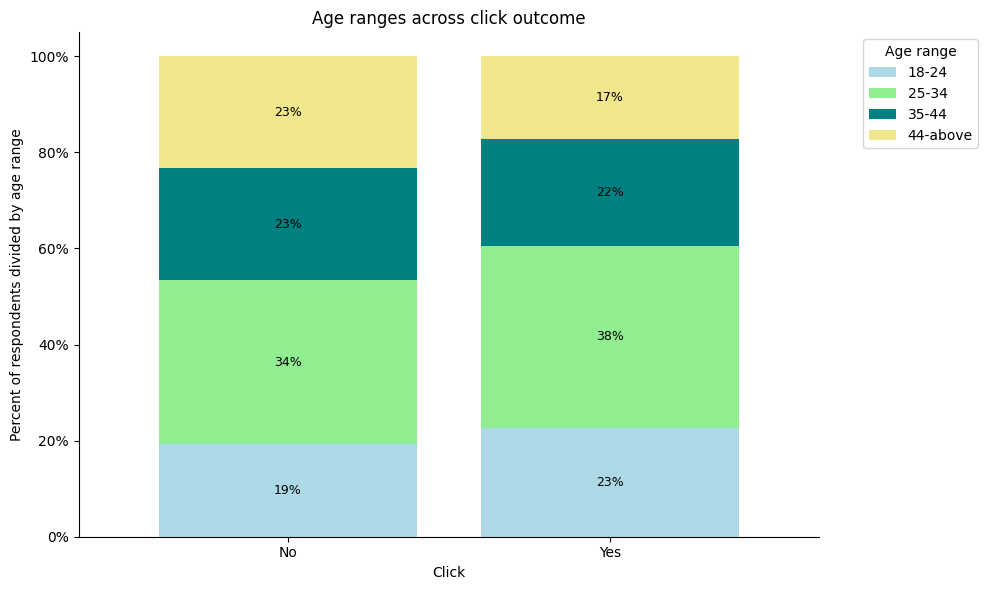

In [241]:
# Optional: enforce an order for readability
age_order = ["18-24", "25-34", "35-44", "44-above"]

# Make sure click is 0/1 even if it's bool or 'Yes'/'No'
click_series = df["click"].astype(int)
click_order = [0, 1]  # 0 = No click, 1 = Clicked

# Crosstab so each BAR = one click outcome; segments = age
prop_table = (
    pd.crosstab(click_series, df["age"], normalize="index")
      .reindex(index=click_order, columns=age_order, fill_value=0)
)

# Plot
ax = prop_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["lightblue", "lightgreen", "teal", "khaki"][:prop_table.shape[1]],
    width=0.8
)

# Titles/labels
plt.title("Age ranges across click outcome")
plt.xlabel("Click")
plt.ylabel("Percent of respondents divided by age range")

# Y-axis as percentages (data are 0–1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Clean spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Inside-segment % labels (0–1 -> 0–100%)
for container in ax.containers:
    values = container.datavalues
    labels = [f"{v*100:.0f}%" if v >= 0.06 else "" for v in values]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=9)

# Legend formatting
plt.legend(title="Age range", bbox_to_anchor=(1.05, 1), loc="upper left")
ax.set_xticklabels(["No", "Yes"])  # nicer labels than 0/1
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


In [242]:
df["location"].value_counts()

location
Greece            189
Germany           160
Italy             129
France            129
Spain             112
Poland             84
Netherlands        42
Czech Republic     23
Portugal           22
Belgium            21
Hungary            19
Austria            16
Switzerland        15
Sweden             13
Finland            11
Denmark            10
Norway              5
Name: count, dtype: int64

In [243]:
df["sustain_conscious_cat"].value_counts()

KeyError: 'sustain_conscious_cat'

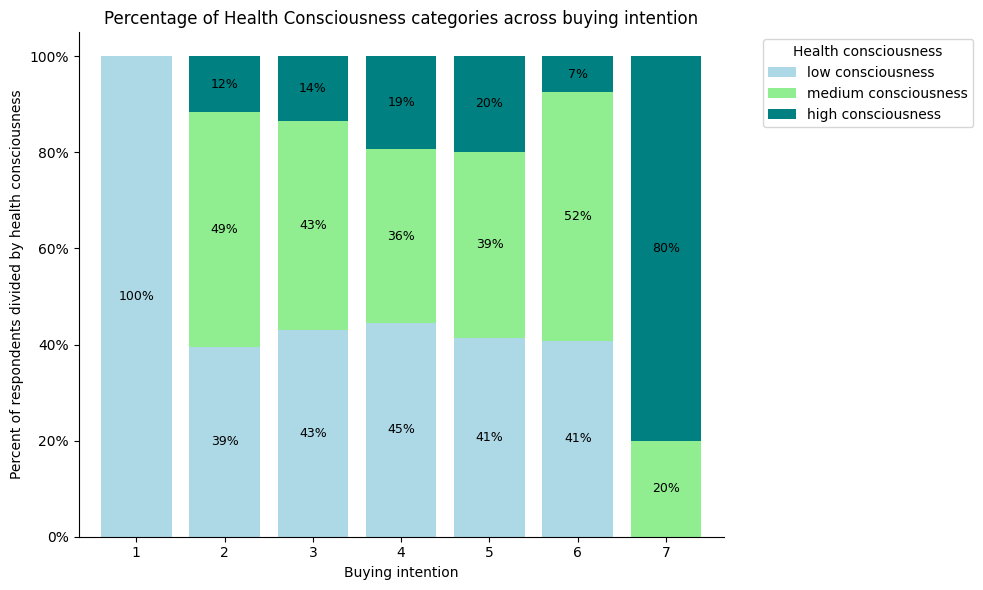

In [ ]:
# Optional: enforce an order for readability
health_order = ["low consciousness", "medium consciousness", "high consciousness"]
# Buying intention order if you want left-to-right (adjust as needed)
bi_order = sorted(df["buying_intention"].unique())

# Crosstab so each BAR = one health category; segments = buying intention
prop_table = pd.crosstab(
    df["buying_intention"],
    df["health_conscious_cat"],
    normalize="index"
).reindex(index=bi_order, columns=health_order)

# Plot
ax = prop_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["lightblue", "lightgreen", "teal", "khaki", "lightcoral", "plum"][:prop_table.shape[1]],
    width=0.8
)

# Titles/labels
plt.title("Percentage of Health Consciousness categories across buying intention")
plt.xlabel("Buying intention")
plt.ylabel("Percent of respondents divided by health consciousness")

# Y-axis as percentages (data are 0–1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Clean spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Inside-segment % labels (0–1 -> 0–100%)
for container in ax.containers:
    values = container.datavalues  # these are proportions
    # Only label segments that are big enough to read
    labels = [f"{v*100:.0f}%" if v >= 0.06 else "" for v in values]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=9)

# Legend formatting
plt.legend(title="Health consciousness", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


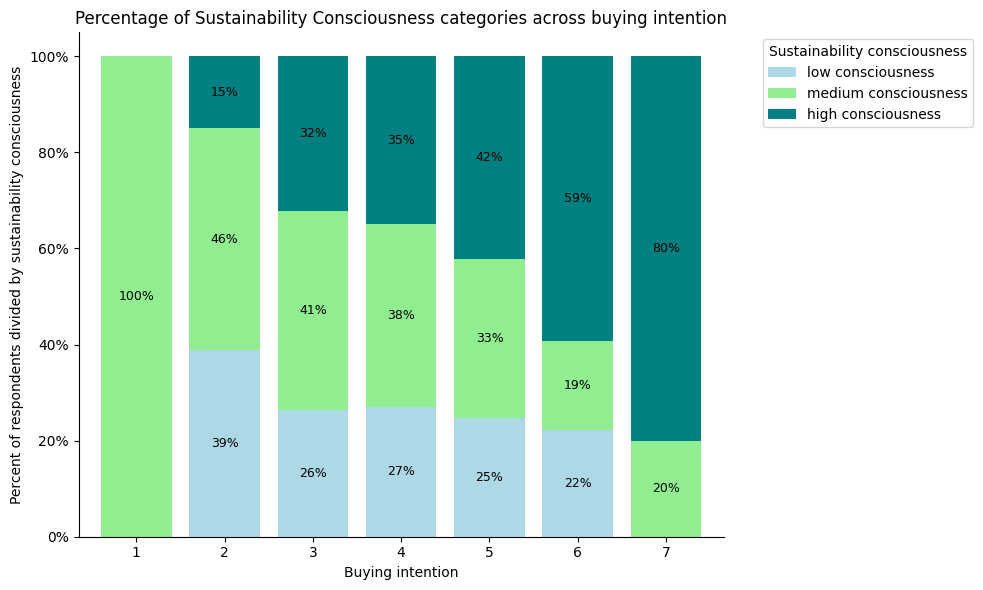

In [ ]:
# Crosstab so each BAR = one health category; segments = buying intention
prop_table = pd.crosstab(
    df["buying_intention"],
    df["sustain_conscious_cat"],
    normalize="index"
).reindex(index=bi_order, columns=health_order)

# Plot
ax = prop_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6),
    color=["lightblue", "lightgreen", "teal", "khaki", "lightcoral", "plum"][:prop_table.shape[1]],
    width=0.8
)

# Titles/labels
plt.title("Percentage of Sustainability Consciousness categories across buying intention")
plt.xlabel("Buying intention")
plt.ylabel("Percent of respondents divided by sustainability consciousness")

# Y-axis as percentages (data are 0–1)
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Clean spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Inside-segment % labels (0–1 -> 0–100%)
for container in ax.containers:
    values = container.datavalues  # these are proportions
    # Only label segments that are big enough to read
    labels = [f"{v*100:.0f}%" if v >= 0.06 else "" for v in values]
    ax.bar_label(container, labels=labels, label_type="center", fontsize=9)

# Legend formatting
plt.legend(title="Sustainability consciousness", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


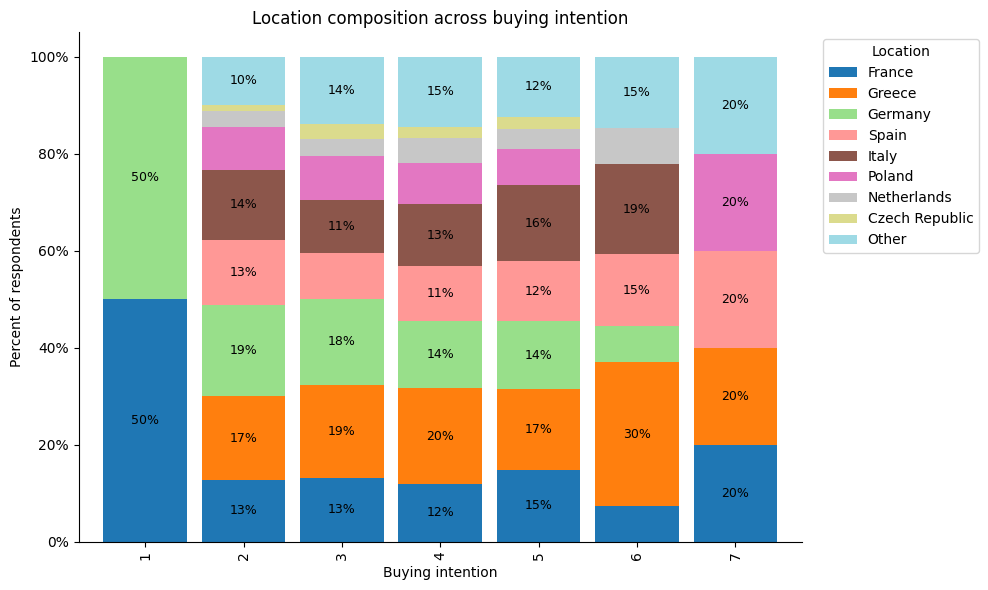

In [ ]:
bi_order = sorted(df['buying_intention'].dropna().unique())

# Keep top K locations; rest -> "Other"
K = 8
top_locs = df['location'].value_counts().head(K).index
loc = df['location'].where(df['location'].isin(top_locs), 'Other')

tab = (pd.crosstab(df['buying_intention'], loc, normalize='index')
         .reindex(index=bi_order))

# Order stacks by overall prevalence; keep "Other" last
col_order = tab.sum(0).sort_values(ascending=False).index.tolist()
if 'Other' in col_order:
    col_order = [c for c in col_order if c != 'Other'] + ['Other']
tab = tab[col_order]

ax = tab.plot(kind='bar', stacked=True, figsize=(10,6), width=0.85, colormap='tab20')
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.spines['top'].set_visible(False); ax.spines['right'].set_visible(False)
plt.title('Location composition across buying intention')
plt.xlabel('Buying intention'); plt.ylabel('Percent of respondents')
plt.legend(title='Location', bbox_to_anchor=(1.02,1), loc='upper left', ncol=1)
# inside labels only for large segments
for cont in ax.containers:
    vals = cont.datavalues
    labels = [f"{v*100:.0f}%" if v >= 0.10 else "" for v in vals]
    ax.bar_label(cont, labels=labels, label_type='center', fontsize=9)
plt.tight_layout(); plt.show()
